In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
test_df.tail()

,id,comment_text
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."
153163,ffffce3fb183ee80,""" \n :::Stop already. Your bullshit is not wel..."


In [5]:
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [6]:
train_df.shape

(159571, 7)

In [7]:
test_df.shape

(153164, 1)

In [8]:
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
train_df.malignant.value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

In [10]:
#Percentage of malignant and not malignant
print('Not malignant : ', round(len(train_df[train_df['malignant']==0]) / len(train_df.malignant),2)*100,'%')
print('Malignant : ', round(len(train_df[train_df['malignant']==1]) / len(train_df.malignant),2)*100,'%')

Not malignant :  90.0 %
Malignant :  10.0 %


In [11]:
# length of the Comment_text with len() function and store in new features Comment_length. It helps to differentiate each and
# every data.

train_df['Comment_length'] = train_df.comment_text.str.len()
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [12]:
# Convert all the data in a particular case. I have converted all in lower case
train_df['comment_text'] = train_df.comment_text.str.lower()
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [13]:
test_df['Comment_length'] = test_df.comment_text.str.len()
test_df.head()

,comment_text,Comment_length
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41


In [14]:
test_df['comment_text'] = test_df.comment_text.str.lower()
test_df.head()

,comment_text,Comment_length
0,yo bitch ja rule is more succesful then you'll...,367
1,== from rfc == \n\n the title is fine as it is...,50
2,""" \n\n == sources == \n\n * zawe ashton on lap...",54
3,":if you have a look back at the source, the in...",205
4,i don't anonymously edit articles at all.,41


In [15]:
#I have removed approximately all regular expressions available in the comment_text feature.
train_df['comment_text'] = train_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email')

train_df['comment_text'] = train_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-z]{2,3}(/\s*)?$', 'URL')

train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

train_df['comment_text'] = train_df['comment_text'].str.replace(r'\d+(\.\d+)?','number')

In [16]:
test_df['comment_text'] = test_df['comment_text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'email')

test_df['comment_text'] = test_df['comment_text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-z]{2,3}(/\s*)?$', 'URL')

test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

test_df['comment_text'] = test_df['comment_text'].str.replace(r'\d+(\.\d+)?','number')

In [17]:
#Also i have replaced extra white space 
train_df['comment_text'] = train_df['comment_text'].str.replace(r'[^\w\d\s]',' ')

train_df['comment_text'] = train_df['comment_text'].str.replace(r'\s+',' ')

train_df['comment_text'] = train_df['comment_text'].str.replace(r'^\s+|\s+?$', ' ')

In [18]:
test_df['comment_text'] = test_df['comment_text'].str.replace(r'[^\w\d\s]',' ')

test_df['comment_text'] = test_df['comment_text'].str.replace(r'\s+',' ')

test_df['comment_text'] = test_df['comment_text'].str.replace(r'^\s+|\s+?$', ' ')

In [19]:
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length
0,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,d aww he matches this background colour i m se...,0,0,0,0,0,0,112
2,hey man i m really not trying to edit war it s...,0,0,0,0,0,0,233
3,more i can t make any real suggestions on imp...,0,0,0,0,0,0,622
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0,67


In [20]:
test_df.head()

,comment_text,Comment_length
0,yo bitch ja rule is more succesful then you ll...,367
1,from rfc the title is fine as it is imo,50
2,sources zawe ashton on lapland,54
3,if you have a look back at the source the inf...,205
4,i don t anonymously edit articles at all,41


In [21]:
import nltk
import string
from nltk.corpus import stopwords

stop_word = set(stopwords.words('english') + ['yo','d', 'fak'])

In [22]:
# I have removed all stopwords from comment_text feature.
train_df['comment_text'] = train_df['comment_text'].apply(lambda x: ' '.join(
                                    term for term in x.split() if term not in stop_word))

In [23]:
test_df['comment_text']= test_df['comment_text'].apply(lambda x: ' '.join(
                                 term for term in x.split() if term not in stop_word))

In [24]:
# After removing the stop word length of the comment_text feature, I have stored in the new feature name is clean_len.
train_df['clean_len'] = train_df.comment_text.str.len()
train_df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Comment_length,clean_len
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,172
1,aww matches background colour seemingly stuck ...,0,0,0,0,0,0,112,97
2,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,233,141
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,sir hero chance remember page,0,0,0,0,0,0,67,29


In [25]:
test_df['clean_len'] = test_df.comment_text.str.len()
test_df.head()

,comment_text,Comment_length,clean_len
0,bitch ja rule succesful ever whats hating sad ...,367,238
1,rfc title fine imo,50,18
2,sources zawe ashton lapland,54,27
3,look back source information updated correct f...,205,109
4,anonymously edit articles,41,25


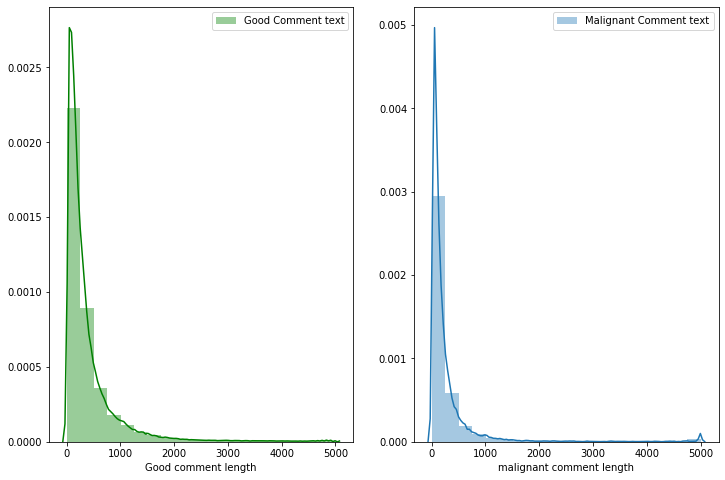

In [26]:
# Ploting the EDA
f, ax = plt.subplots(1,2, figsize=(12, 8))

sns.distplot(train_df[train_df['malignant']==0]['Comment_length'], bins=20, ax=ax[0], label='Good Comment text', color='g')
ax[0].set_xlabel('Good comment length')
ax[0].legend()


sns.distplot(train_df[train_df['malignant']==1]['Comment_length'], bins=20, ax=ax[1], label='Malignant Comment text')
ax[1].set_xlabel('malignant comment length')
ax[1].legend()

plt.show()

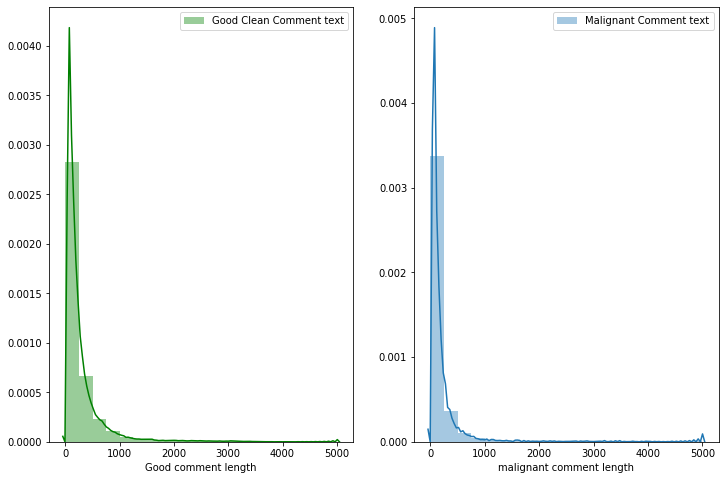

In [27]:
f, ax = plt.subplots(1,2, figsize=(12, 8))

sns.distplot(train_df[train_df['malignant']==0]['clean_len'], bins=20, ax=ax[0], label='Good Clean Comment text', color='g')
ax[0].set_xlabel('Good comment length')
ax[0].legend()


sns.distplot(train_df[train_df['malignant']==1]['clean_len'], bins=20, ax=ax[1], label='Malignant Comment text')
ax[1].set_xlabel('malignant comment length')
ax[1].legend()

plt.show()

In [28]:
!pip install wordcloud

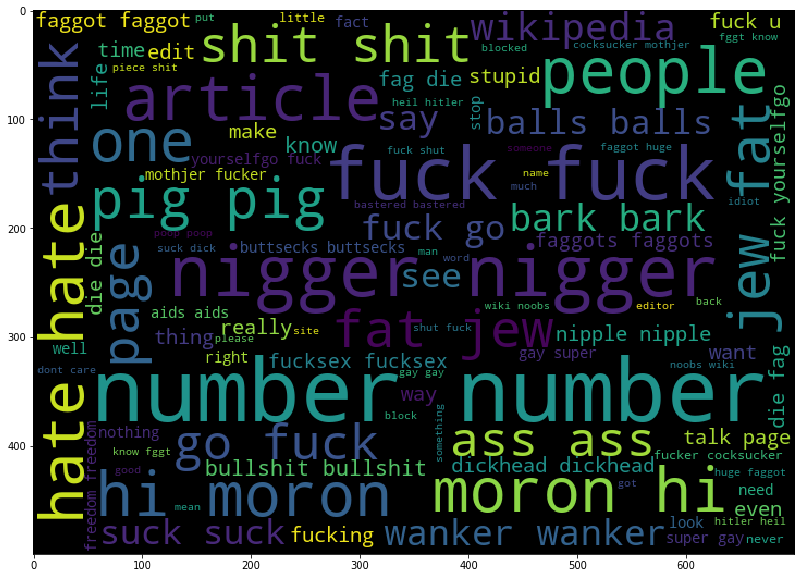

In [29]:
from wordcloud import WordCloud

malignant = train_df['comment_text'][train_df['malignant']==1]

rude_word = WordCloud(width=700, height=500, background_color='black', max_words=100).generate(' '.join(malignant))
plt.figure(figsize=(15,10))
plt.imshow(rude_word)
plt.show()

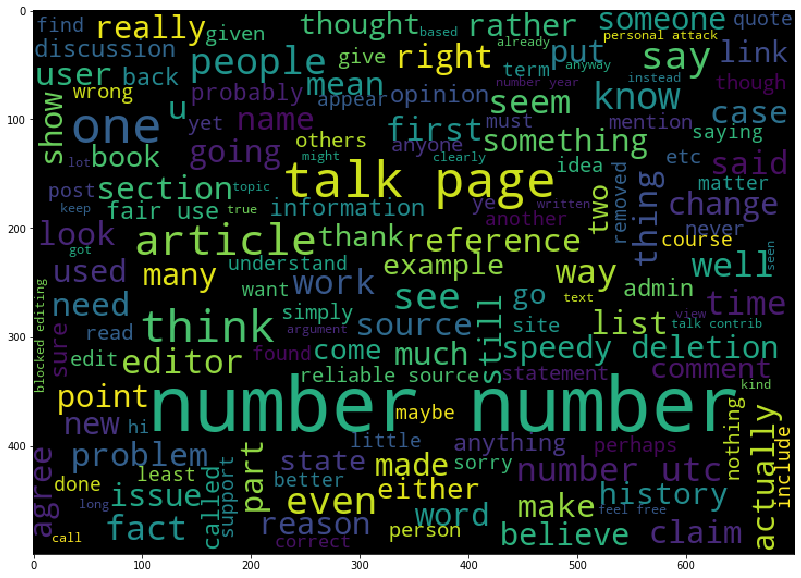

In [30]:
good = train_df['comment_text'][train_df['malignant']==0]

good_word = WordCloud(width=700, height=500, background_color='black', max_words=150).generate(' '.join(good))
plt.figure(figsize=(15,10))
plt.imshow(good_word)
plt.show()

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
tfidf = TfidfVectorizer()
features=tfidf.fit_transform(train_df['comment_text'])

In [33]:
x=features
y=train_df['malignant']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

In [35]:
mnb, lg, knn, dtc, rfc = MultinomialNB(), LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()

In [36]:
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test, predmnb))
print(confusion_matrix(y_test, predmnb))
print(classification_report(y_test, predmnb))

0.920637705863184
[[36064    14]
 [ 3152   663]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     36078
           1       0.98      0.17      0.30      3815

    accuracy                           0.92     39893
   macro avg       0.95      0.59      0.63     39893
weighted avg       0.93      0.92      0.89     39893



In [37]:
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test, predlg))
print(confusion_matrix(y_test, predlg))
print(classification_report(y_test, predlg))

0.9550046374050585
[[35897   181]
 [ 1614  2201]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     36078
           1       0.92      0.58      0.71      3815

    accuracy                           0.96     39893
   macro avg       0.94      0.79      0.84     39893
weighted avg       0.95      0.96      0.95     39893



In [38]:
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.8947434386985186
[[35033  1045]
 [ 3154   661]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     36078
           1       0.39      0.17      0.24      3815

    accuracy                           0.89     39893
   macro avg       0.65      0.57      0.59     39893
weighted avg       0.87      0.89      0.88     39893



In [39]:
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test, pred_dtc))
print(confusion_matrix(y_test, pred_dtc))
print(classification_report(y_test, pred_dtc))

0.944000200536435
[[35009  1069]
 [ 1165  2650]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     36078
           1       0.71      0.69      0.70      3815

    accuracy                           0.94     39893
   macro avg       0.84      0.83      0.84     39893
weighted avg       0.94      0.94      0.94     39893



In [40]:
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print(accuracy_score(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test, pred_rfc))

0.9472839846589627
[[35855   223]
 [ 1880  1935]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     36078
           1       0.90      0.51      0.65      3815

    accuracy                           0.95     39893
   macro avg       0.92      0.75      0.81     39893
weighted avg       0.95      0.95      0.94     39893



In [44]:
from sklearn.externals import joblib
joblib.dump(lg,'MalignantCommentFile.obj')

['MalignantCommentFile.obj']